# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



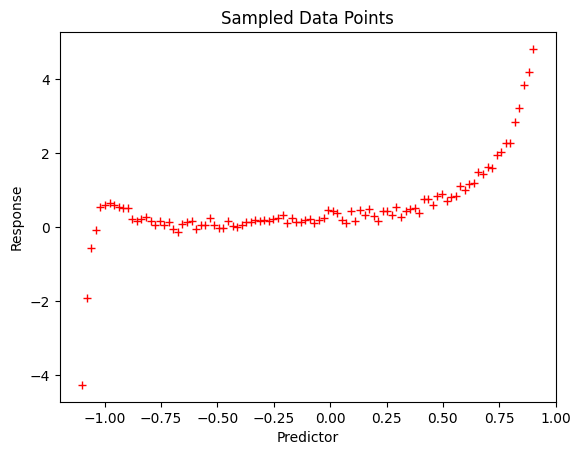

In [3]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [4]:
# Linear regression from scratch
def linear_regression(X, y):
    X_b = np.c_[np.ones((len(X), 1)), X]  
    beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return beta  # Returns [beta_0, beta_1]

In [5]:
# Calculate MSE
def calculate_mse(y, y_pred):
    mse = np.mean((y - y_pred)**2)
    return mse

In [6]:
# Fit and evaluate linear model
beta_linear = linear_regression(predictor, response)
y_pred_linear = np.c_[np.ones((len(predictor), 1)), predictor].dot(beta_linear)
mse_linear = calculate_mse(response, y_pred_linear)

In [7]:
mse_linear

0.600330044869276

In [8]:
# Polynomial regression from scratch
def polynomial_regression(X, y, degree):
    # Generating the design matrix for polynomial of given degree
    X_poly = np.ones((len(X), 1))  # Start with a column of ones for beta_0
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, np.power(X, i)]
    
    beta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    
    return beta # Returns [beta_0, beta_1, ..., beta_k]


In [9]:
# Fit and evaluate polynomial model
degree_poly = 5  # Example degree
beta_poly = polynomial_regression(predictor, response, degree_poly)
X_poly = np.ones((len(predictor), 1))
for i in range(1, degree_poly + 1):
    X_poly = np.c_[X_poly, np.power(predictor, i)]
y_pred_poly = X_poly.dot(beta_poly)
mse_poly = calculate_mse(response, y_pred_poly)


In [10]:
mse_poly



0.13798521147785534

In [11]:
print(f"Linear Regression MSE: {mse_linear}")
print(f"Polynomial Regression (Degree {degree_poly}) MSE: {mse_poly}")

Linear Regression MSE: 0.600330044869276
Polynomial Regression (Degree 5) MSE: 0.13798521147785534


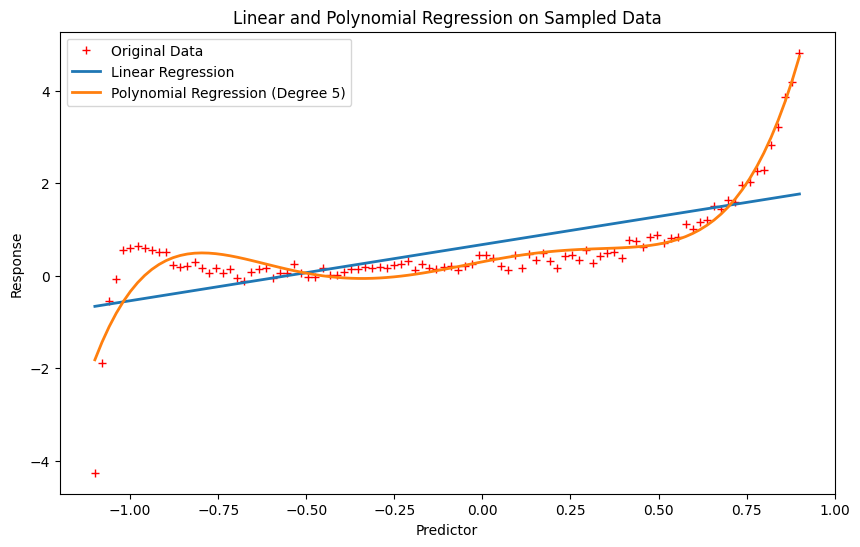

In [12]:
# Plotting
plt.figure(figsize=(10, 6))

# Original data
plt.plot(predictor, response, 'r+', label='Original Data')

# Linear regression line
plt.plot(predictor, y_pred_linear, label='Linear Regression', linewidth=2)

# Polynomial regression curve
plt.plot(predictor, y_pred_poly, label=f'Polynomial Regression (Degree {degree_poly})', linewidth=2)

plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Linear and Polynomial Regression on Sampled Data')
plt.legend()
plt.show()

In [13]:
# evaluating models and reporting results
degrees = range(1,26)
mse_results = []
coefficients = []

In [14]:
for degree in degrees:
    beta = polynomial_regression(predictor,response,degree)
    X_poly = np.ones((len(predictor), 1))
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, np.power(predictor, i)]
    y_pred_poly = X_poly.dot(beta)
    mse = calculate_mse(response, y_pred_poly)
    mse_results.append(mse)
    coefficients.append(beta)

In [15]:
mse_results

[0.600330044869276,
 0.4516809977736244,
 0.24638190906413093,
 0.24565793821351992,
 0.13798521147785534,
 0.11363214524637609,
 0.055443391368068785,
 0.03937841880658621,
 0.02066391889369361,
 0.014011822906618005,
 0.011363371751675346,
 0.009561036401824381,
 0.009352682352610033,
 0.009110693045966359,
 0.009110588823992655,
 0.00855263913971223,
 0.008541854982054677,
 0.008460649761295486,
 0.008320099866766567,
 0.008409095772959509,
 0.0581131136511172,
 0.015860493210690517,
 0.009953660222126152,
 0.02366104207408888,
 0.06563190066064663]

In [16]:
# Reporting MSE for each degree
print("Degree\tMSE")
for degree, mse in zip(degrees, mse_results):
    print(f"{degree}\t{mse:.5f}")

Degree	MSE
1	0.60033
2	0.45168
3	0.24638
4	0.24566
5	0.13799
6	0.11363
7	0.05544
8	0.03938
9	0.02066
10	0.01401
11	0.01136
12	0.00956
13	0.00935
14	0.00911
15	0.00911
16	0.00855
17	0.00854
18	0.00846
19	0.00832
20	0.00841
21	0.05811
22	0.01586
23	0.00995
24	0.02366
25	0.06563


In [17]:
# Comparing coefficients for the 25 degree polynomial
original_coeffs = np.random.rand(26)  # Coefficients from gen_data()
estimated_coeffs_25 = coefficients[-1]  # Coefficients from the 25 degree model

print("\nComparison of Original and Estimated Coefficients for 25 Degree Polynomial:")
print(f"Original Coefficients: {original_coeffs}")
print(f"Estimated Coefficients: {estimated_coeffs_25}")


Comparison of Original and Estimated Coefficients for 25 Degree Polynomial:
Original Coefficients: [0.12509642 0.88088851 0.58252647 0.71916421 0.29372421 0.91396738
 0.6546382  0.80516137 0.59420685 0.57008084 0.0209295  0.53341437
 0.16555457 0.04921941 0.34392012 0.80537884 0.64966189 0.1551516
 0.32318009 0.67038803 0.62729547 0.93044001 0.40283567 0.40512175
 0.61071077 0.04271579]
Estimated Coefficients: [ 1.59249553e-02  1.70594554e+00 -2.34050105e-01 -4.77017069e+01
  6.99857146e+00  8.65373879e+02  1.29547222e+02 -7.55555865e+03
 -2.30157634e+03  3.80555090e+04  1.79683302e+04 -1.17301403e+05
 -7.73395518e+04  2.16604072e+05  1.88511180e+05 -2.02204881e+05
 -2.36140444e+05  2.78383264e+03  6.36118088e+04  1.68398045e+05
  1.97942202e+05 -1.02398243e+05 -2.32405819e+05 -2.66285971e+04
  8.02807379e+04  2.96901134e+04]


In [18]:
# your code here

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

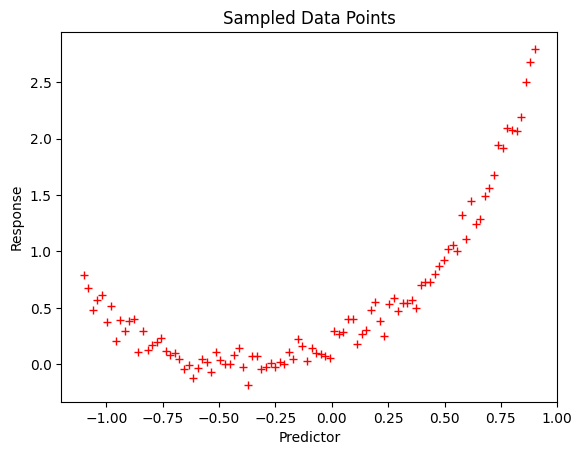

In [19]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [20]:
# your code here
def ridge_regression(X, y, degree, lambda_param):
    X_poly = np.ones((len(X), 1))  # Start with a column of ones for beta_0
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, np.power(X, i)]
    
    # Incorporating L2 regularization
    I = np.eye(X_poly.shape[1])
    I[0, 0] = 0  # Excluding bias term from regularization
    beta = np.linalg.inv(X_poly.T.dot(X_poly) + lambda_param * I).dot(X_poly.T).dot(y)
    
    return beta

In [21]:
# Choosing a high degree for overfitting demonstration
degree_high = 15

In [22]:
# L2 Regularization parameter
lambda_param = 0.1

In [23]:
# Fit with Ridge regularization
beta_ridge = ridge_regression(predictor_low, response_low, degree_high, lambda_param)


In [24]:
beta_with_no_regularization = ridge_regression(predictor_low,response_low,degree_high,0)

In [25]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures


In [26]:
poly_features = PolynomialFeatures(degree = 15)
x_poly_lasso = poly_features.fit_transform(predictor_low.reshape(-1,1))

# perform lasso regression
lasso_reg = Lasso(alpha=0.01,max_iter=10000)
lasso_reg.fit(x_poly_lasso,response_low)

Lasso(alpha=0.01, max_iter=10000)

In [27]:
# predict using the lasso model 
y_pred_lasso = lasso_reg.predict(x_poly_lasso)

In [28]:
mse_lasso = calculate_mse(response_low, y_pred_lasso)

In [29]:
mse_lasso

0.014478516343277006

In [30]:
# predicting with no regularization model
x_poly_with_no_regularization = np.ones((len(predictor_low),1))
for i in range(1,degree_high +1):
    x_poly_with_no_regularization =  np.c_[x_poly_with_no_regularization, np.power(predictor_low,i)]
y_pred_with_no_regularization = x_poly_with_no_regularization.dot(beta_with_no_regularization)

In [31]:
mse_with_no_regularization = calculate_mse(response_low,y_pred_with_no_regularization)

In [32]:
mse_with_no_regularization

0.006989074591749983

In [33]:
# Predicting with Ridge model
X_poly_ridge = np.ones((len(predictor_low), 1))
for i in range(1, degree_high + 1):
    X_poly_ridge = np.c_[X_poly_ridge, np.power(predictor_low, i)]
y_pred_ridge = X_poly_ridge.dot(beta_ridge)


In [34]:
mse_ridge = calculate_mse(response_low,y_pred_ridge)

In [35]:
mse_ridge

0.007554519718130915

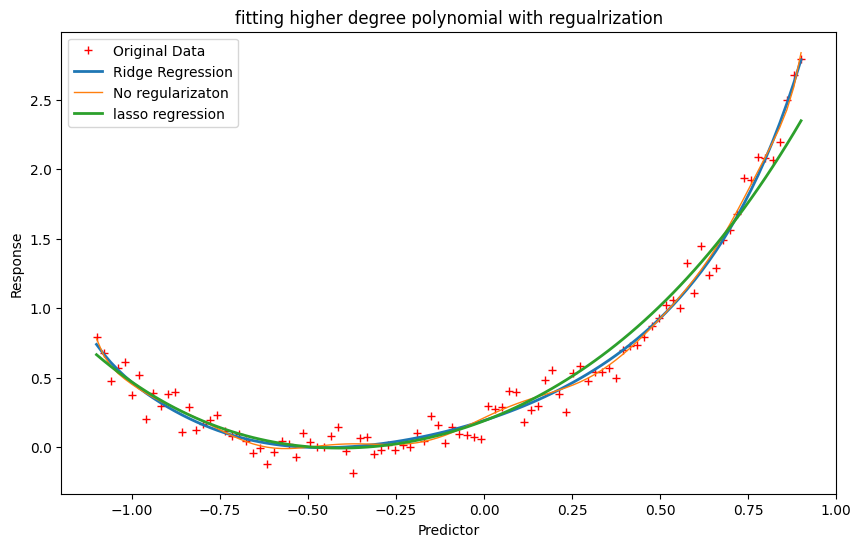

In [36]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(predictor_low, response_low, 'r+', label='Original Data')
plt.plot(predictor_low, y_pred_ridge, label='Ridge Regression', linewidth=2)
plt.plot(predictor_low,y_pred_with_no_regularization,label = 'No regularizaton', linewidth = 1)
plt.plot(predictor_low,y_pred_lasso,label  = 'lasso regression',linewidth = 2)
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('fitting higher degree polynomial with regualrization')
plt.legend()
plt.show()

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [37]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [38]:
# Separate predictors (X) and response variable (Y)
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
Y = credit['Balance']

In [39]:
# Function to normalize features
def normalize_features(X):
    return (X - X.mean()) / X.std()

In [40]:
# Function to perform gradient descent for linear regression
def gradient_descent(X, Y, alpha, num_iterations):
    m = len(Y)
    ones = np.ones((m, 1))
    X = np.concatenate((ones, X), axis=1)  # Adding a column of ones for the bias term
    theta = np.zeros(X.shape[1])  # Initialize parameters to zeros

    for _ in range(num_iterations):
        error = np.dot(X, theta) - Y
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient

    return theta


In [41]:
# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(X, Y, theta):
    m = len(Y)
    ones = np.ones((m, 1))
    X = np.concatenate((ones, X), axis=1)  # Adding a column of ones for the bias term
    predicted_values = np.dot(X, theta)
    mse = np.sum((predicted_values - Y) ** 2) / m
    return mse

In [42]:
# Normalize features
X = normalize_features(X)


In [43]:
# Set hyperparameters
alpha = 0.01  # Learning rate
num_iterations = 1000

In [44]:
# Perform gradient descent
theta = gradient_descent(X, Y, alpha, num_iterations)

In [45]:
# Calculate Mean Squared Error (MSE)
mse_credit= mean_squared_error(X, Y, theta)


In [46]:
mse_credit

25948.66473717143

In [47]:
# Display the learned parameters and MSE
print("Learned Parameters (theta):", theta)
print("Mean Squared Error (MSE):", mse)

Learned Parameters (theta): [ 519.9925503  -239.21431532  292.81228739  292.36700292   18.44934523
  -18.56518876    6.45586425]
Mean Squared Error (MSE): 0.06563190066064663


In [48]:
from scipy import stats
# Function to perform hypothesis testing and variable selection
def variable_selection(X, Y, alpha, num_iterations, significance_level):
    m = len(Y)
    n = X.shape[1]

    # Normalize features
    X_normalized = normalize_features(X)

    # Perform gradient descent
    theta = gradient_descent(X_normalized, Y, alpha, num_iterations)

    # Calculate Mean Squared Error (MSE)
    mse_full_model = mean_squared_error(X_normalized, Y, theta)

    # Test each variable
    for i in range(n):
        # Exclude the variable and fit the model
        X_temp = np.delete(X_normalized, i, axis=1)
        theta_temp = gradient_descent(X_temp, Y, alpha, num_iterations)

        # Calculate MSE for the reduced model
        mse_reduced_model = mean_squared_error(X_temp, Y, theta_temp)

        # Calculate F-statistic and p-value
        f_statistic = ((mse_reduced_model - mse_full_model) / (n - 1)) / (mse_full_model / (m - n))
        p_value = 1 - stats.f.cdf(f_statistic, 1, m - n)

        # Print results
        print(f"Variable {i + 1}: F-statistic = {f_statistic}, p-value = {p_value}")

        # Check significance and print a message
        if p_value < significance_level:
            print(f"Variable {i + 1} is significant.")
        else:
            print(f"Variable {i + 1} is not significant and can be discarded.")


In [49]:
significance_level = 0.05  

In [50]:
# Perform variable selection
variable_selection(X, Y, alpha, num_iterations, significance_level)

Variable 1: F-statistic = 76.69680593465729, p-value = 1.1102230246251565e-16
Variable 1 is significant.
Variable 2: F-statistic = 4.361047619960522, p-value = 0.0374112079553609
Variable 2 is significant.
Variable 3: F-statistic = 4.427511887287855, p-value = 0.035997113350532906
Variable 3 is significant.
Variable 4: F-statistic = 0.778663847330291, p-value = 0.3780881372102085
Variable 4 is not significant and can be discarded.
Variable 5: F-statistic = 0.6339997244726316, p-value = 0.4263714611662289
Variable 5 is not significant and can be discarded.
Variable 6: F-statistic = 0.11564785781947394, p-value = 0.7339847573443632
Variable 6 is not significant and can be discarded.


In [51]:
discarded_variable_index = 2

In [52]:
new_X = X [['Income','Limit','Rating']]

In [53]:
new_X = normalize_features(new_X)

In [57]:
new_theta = gradient_descent(new_X,Y,alpha,num_iterations)

In [58]:
new_mse_credit = mean_squared_error(new_X,Y,new_theta)

In [59]:
new_mse_credit

26418.634398959613

In [60]:
# 3. test for interaction effects between rating and age

credit['Rating_Age_Interaction'] = credit['Rating'] * credit['Age']
X_interaction = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Rating_Age_Interaction']]
# X_interaction = sm.add_constant(X_interaction)

In [61]:
X_interaction

,Income,Limit,Rating,Cards,Age,Education,Rating_Age_Interaction
0,14.891,3606,283,2,34,11,9622
1,106.025,6645,483,3,82,15,39606
2,104.593,7075,514,4,71,11,36494
3,148.924,9504,681,3,36,11,24516
4,55.882,4897,357,2,68,16,24276
...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,9824
396,13.364,3838,296,5,65,17,19240
397,57.872,4171,321,5,67,12,21507
398,37.728,2525,192,1,44,13,8448


In [62]:
X_interaction = normalize_features(X_interaction)

In [63]:
theta_interaction = gradient_descent(X_interaction,Y,alpha,num_iterations)

In [64]:
mse_with_interaction = mean_squared_error(X_interaction,Y,theta_interaction)

In [65]:
mse_with_interaction

26588.589920835755

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [68]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [69]:
# your code here

In [70]:
X = sharks[['Year', 'Month', 'Temperature', 'IceCreamSales']]
y = sharks['SharkAttacks']

In [71]:
train_size = int(0.8 * len(X))
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

In [72]:
def linear_regression(X, y):
    X = np.column_stack((np.ones(len(X)), X))  # Add a column of ones for the intercept
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    return coefficients

In [73]:
coefficients_with_ice_cream = linear_regression(X_train, y_train)


In [74]:
coefficients_without_ice_cream =linear_regression(X_train[['Year', 'Month', 'Temperature']], y_train)

In [75]:
def manual_predict(coefficients, X):
    X = np.column_stack((np.ones(len(X)), X))
    predictions = X @ coefficients
    return predictions


In [76]:

y_pred_with_ice_cream = manual_predict(coefficients_with_ice_cream, X_test)


In [77]:
y_pred_without_ice_cream = manual_predict(coefficients_without_ice_cream, X_test[['Year', 'Month', 'Temperature']])

In [78]:
mse_with_ice_cream = np.mean((y_test - y_pred_with_ice_cream) ** 2)
mse_without_ice_cream = np.mean((y_test - y_pred_without_ice_cream) ** 2)

In [79]:
mse_with_ice_cream

69.93373844674238

In [80]:
mse_without_ice_cream

78.89088979938641